<img src='https://www.actris.eu/sites/default/files/inline-images/Actris%20logo.png' width=200 align=right>

# ACTRIS DC 
## Access ACTRIS In-Situ data

In [23]:
# import packages
import pandas as pd
import numpy as np 
import requests
import json

import matplotlib.pyplot as plt

## Get metadata for instrument and country

After searching in the Metadata REST API, one chooses the metadata from certain parameters. 

In this example we get metadata from all ACTRIS In-Situ Data Centre unit data. Which is provider 14 IN-SITU

In [7]:
response = requests.get("https://prod-actris-md.nilu.no/Metadata/provider/14") 
metadata_archive = response.json() 

In [8]:
metadata_archive

[{'md_metadata': {'id': 38,
   'provider': {'name': 'IN-SITU',
    'atom': 'http://prod-actris-md.nilu.no/Providers/14'},
   'file_identifier': 'https://thredds.nilu.no/thredds/dodsC/actris_nrt/FR0020R.20230530130000.20230815164002.filter_absorption_photometer...11w.1h.FR01L_Magee_AE33_SIR_pm1_NRT.FR01L_Magee_AE33_SIR.lev1.5.nc',
   'language': 'en',
   'hierarchy_level': 'nonGeographicDataset',
   'online_resource': {'linkage': 'http://ebas.nilu.no/'},
   'datestamp': '2023-08-15T14:40:02.0000000Z',
   'created': '2023-09-14T11:14:33.0000000Z',
   'contact': [{'first_name': 'Markus',
     'last_name': 'Fiebig',
     'organisation_name': 'NILU',
     'role_code': ['custodian'],
     'country_code': 'NO',
     'delivery_point': 'Instituttveien 18',
     'address_city': 'Kjeller',
     'administrative_area': 'Viken',
     'postal_code': 2007,
     'email': 'mf@nilu.no',
     'position_name': 'Senior scientist'}]},
  'md_identification': {'abstract': 'Ground based in situ observations of 

In [9]:
files_list = []
for f in metadata_archive:
    url = f['md_distribution_information'][0]['dataset_url']
    files_list.append(url)
files_list

['https://thredds.nilu.no/thredds/dodsC/actris_nrt/FR0020R.20230530130000.20230815164002.filter_absorption_photometer...11w.1h.FR01L_Magee_AE33_SIR_pm1_NRT.FR01L_Magee_AE33_SIR.lev1.5.nc',
 'https://thredds.nilu.no/thredds/dodsC/actris_nrt/FR0020R.20230511110000.20230811094802.filter_absorption_photometer...3mo.1h.FR01L_Magee_AE33_SIR_pm10_NRT.FR01L_Magee_AE33_SIR.lev1.5.nc',
 'https://thredds.nilu.no/thredds/dodsC/actris_nrt/RO0010R.20230614050000.20230914050634.filter_absorption_photometer...3mo.1h.RO03L_Magee_AE33_INO_NRT.RO03L_AE33.lev1.5.nc',
 'https://thredds.nilu.no/thredds/dodsC/actris_nrt/GR0100B.20230614050000.20230914051039.filter_absorption_photometer...3mo.1h.GR05L_Magee_AE33_DEM_dry_NRT.GR05L_abs_coef_AE33_v1.lev1.5.nc',
 'https://thredds.nilu.no/thredds/dodsC/actris_nrt/ES0020U.20230614050000.20230914043809.nephelometer..aerosol.3mo.1h.ES08L_TSI_3563_UGR_NRT.ES08L_scat_coef.lev1.5.nc',
 'https://thredds.nilu.no/thredds/dodsC/actris_nrt/IT0004R.20230614050000.202309140436

**fileServer** er direkte nedlasting via http, da får du en fysisk netCDF fil.

**dodsC** er opendap protokollen, det er streaming av data i binary form, ingen nedlasting kreves.

In [10]:
for f in files_list: 
    if 'fileServer' in f: 
        files_list.remove(f)
files_list

['https://thredds.nilu.no/thredds/dodsC/actris_nrt/FR0020R.20230530130000.20230815164002.filter_absorption_photometer...11w.1h.FR01L_Magee_AE33_SIR_pm1_NRT.FR01L_Magee_AE33_SIR.lev1.5.nc',
 'https://thredds.nilu.no/thredds/dodsC/actris_nrt/FR0020R.20230511110000.20230811094802.filter_absorption_photometer...3mo.1h.FR01L_Magee_AE33_SIR_pm10_NRT.FR01L_Magee_AE33_SIR.lev1.5.nc',
 'https://thredds.nilu.no/thredds/dodsC/actris_nrt/RO0010R.20230614050000.20230914050634.filter_absorption_photometer...3mo.1h.RO03L_Magee_AE33_INO_NRT.RO03L_AE33.lev1.5.nc',
 'https://thredds.nilu.no/thredds/dodsC/actris_nrt/GR0100B.20230614050000.20230914051039.filter_absorption_photometer...3mo.1h.GR05L_Magee_AE33_DEM_dry_NRT.GR05L_abs_coef_AE33_v1.lev1.5.nc',
 'https://thredds.nilu.no/thredds/dodsC/actris_nrt/ES0020U.20230614050000.20230914043809.nephelometer..aerosol.3mo.1h.ES08L_TSI_3563_UGR_NRT.ES08L_scat_coef.lev1.5.nc',
 'https://thredds.nilu.no/thredds/dodsC/actris_nrt/IT0004R.20230614050000.202309140436

## Accessing data through THREDDS

THREDDS catalogue: https://thredds.nilu.no/thredds/catalog.html


### Using netCDF4 and opendap protokoll

In [11]:
import netCDF4 as nc

In [12]:
opendap_url = files_list[0]
opendap_url

'https://thredds.nilu.no/thredds/dodsC/actris_nrt/FR0020R.20230530130000.20230815164002.filter_absorption_photometer...11w.1h.FR01L_Magee_AE33_SIR_pm1_NRT.FR01L_Magee_AE33_SIR.lev1.5.nc'

In [13]:
dataset = nc.Dataset(opendap_url)
dataset

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    Conventions: CF-1.8, ACDD-1.3
    featureType: timeSeries
    title: Ground based in situ observations of filter_absorption_photometer at SIRTA Atmospheric Research Observatory (FR0020R)
    keywords: SIRTA Atmospheric Research Observatory, RI-URBANS_NRT, pm1, FR0020R, ACTRIS_NRT, aerosol_absorption_coefficient, GAW-WDCA_NRT
    id: FR0020R.20230530130000.20230815164002.filter_absorption_photometer...11w.1h.FR01L_Magee_AE33_SIR_pm1_NRT.FR01L_Magee_AE33_SIR.lev1.5.nc
    naming_authority: EBAS
    project: ACTRIS_NRT, GAW-WDCA_NRT, RI-URBANS_NRT
    acknowledgement: Request acknowledgement details from data originator
    license: https://creativecommons.org/licenses/by/4.0/
    citation: Jean-Eudes Petit, Olivier Favez, aerosol_absorption_coefficient - filter_absorption_photometer at SIRTA Atmospheric Research Observatory, data hosted by EBAS at NILU
    summary: Ground based in situ obser

### Using xarray and opendap protokoll

In [14]:
import xarray as xr

In [15]:
ds = xr.open_dataset(opendap_url)
ds

<xarray.Dataset>
Dimensions:                                               (time: 1050,
                                                           tbnds: 2,
                                                           metadata_time: 1,
                                                           Location: 1,
                                                           pressure_qc_flags: 2,
                                                           temperature_qc_flags: 2,
                                                           Wavelength: 7,
                                                           aerosol_absorption_coefficient_amean_qc_flags: 2,
                                                           aerosol_absorption_coefficient_prec1587_qc_flags: 2,
                                                           aerosol_absorption_coefficient_perc8413_qc_flags: 2)
Coordinates:
  * time                                                  (time) datetime64[ns] ...
  * metadata_time                                         (metadata_time) datetime64[ns] ...
  * Location                                              (Location) |S64 b'i...
  * Wavelength                                            (Wavelength) float64 ...
Dimensions without coordinates: tbnds, pressure_qc_flags, temperature_qc_flags,
                                aerosol_absorption_coefficient_amean_qc_flags,
                                aerosol_absorption_coefficient_prec1587_qc_flags,
                                aerosol_absorption_coefficient_perc8413_qc_flags
Data variables: (12/17)
    time_bnds                                             (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                                    (metadata_time, tbnds) datetime64[ns] ...
    pressure_qc                                           (Location, pressure_qc_flags, time) float64 ...
    pressure_ebasmetadata                                 (Location, metadata_time) |S64 ...
    temperature_qc                                        (Location, temperature_qc_flags, time) float64 ...
    temperature_ebasmetadata                              (Location, metadata_time) |S64 ...
    ...                                                    ...
    aerosol_absorption_coefficient_perc8413_ebasmetadata  (Wavelength, metadata_time) |S64 ...
    pressure                                              (Location, time) float64 ...
    temperature                                           (Location, time) float64 ...
    aerosol_absorption_coefficient_amean                  (Wavelength, time) float64 ...
    aerosol_absorption_coefficient_prec1587               (Wavelength, time) float64 ...
    aerosol_absorption_coefficient_perc8413               (Wavelength, time) float64 ...
Attributes: (12/106)
    Conventions:                                   CF-1.8, ACDD-1.3
    featureType:                                   timeSeries
    title:                                         Ground based in situ obser...
    keywords:                                      SIRTA Atmospheric Research...
    id:                                            FR0020R.20230530130000.202...
    naming_authority:                              EBAS
    ...                                            ...
    geospatial_lat_units:                          degrees_north
    geospatial_lon_units:                          degrees_east
    comment:                                       {\n    "Data definition": ...
    standard_name_vocabulary:                      CF-1.7, ACDD-1.3
    history:                                       None
    creator_url:                                   ebas.nilu.no

## Plot data with xarray/matplotlib

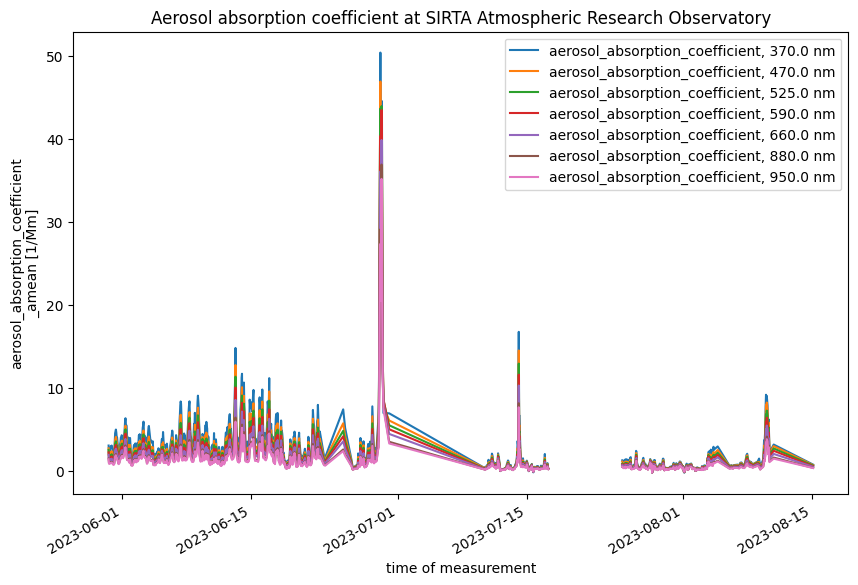

In [47]:
# This code runs if dataset above is dataset from filter absorption photometer instruments. 

ds_filter = ds.aerosol_absorption_coefficient_amean 

fig, ax = plt.subplots(figsize=(10,6))

for i in range(len(ds_filter.Wavelength.values)): 
    ds_filter.isel(Wavelength=i).plot(ax=ax, label="aerosol_absorption_coefficient, {} nm".format(ds_filter.Wavelength.values[i]))

plt.title("{} at {}".format(ds_filter.ebas_component.replace('_',' ').capitalize(), ds.ebas_station_name))
    
plt.legend()
plt.show()